<a href="https://colab.research.google.com/github/yashhrj/ippr-/blob/main/ippr_ex_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [14]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving Screenshot 2026-01-30 121357.png to Screenshot 2026-01-30 121357.png


In [15]:
# Read image
img = cv2.imread(image_path)

# Convert BGR to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

task 1

In [16]:
equalized = cv2.equalizeHist(gray)

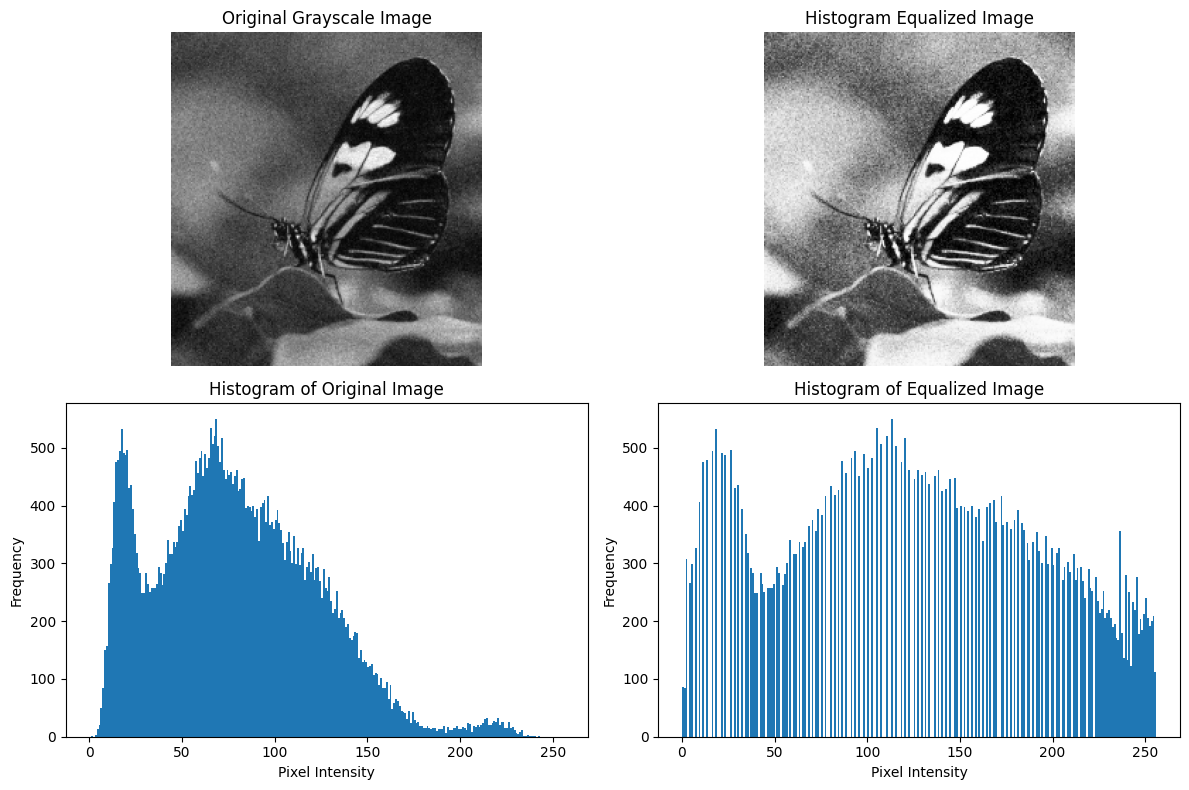

In [17]:
plt.figure(figsize=(12, 8))

# ---- Original Grayscale Image ----
plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

# ---- Equalized Image ----
plt.subplot(2, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis("off")

# ---- Histogram of Original Image ----
plt.subplot(2, 2, 3)
plt.hist(gray.ravel(), bins=256, range=[0,256])
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# ---- Histogram of Equalized Image ----
plt.subplot(2, 2, 4)
plt.hist(equalized.ravel(), bins=256, range=[0,256])
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


TASK 2

In [18]:
from google.colab import files

uploaded_color = files.upload()
color_image_path = list(uploaded_color.keys())[0]


Saving {945DB6EC-6393-4C3A-A078-9F033AC22680}.png to {945DB6EC-6393-4C3A-A078-9F033AC22680}.png


In [19]:
color_img = cv2.imread(color_image_path)
color_img_rgb = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

In [20]:
R, G, B = cv2.split(color_img_rgb)

In [21]:
R_eq = cv2.equalizeHist(R)
G_eq = cv2.equalizeHist(G)
B_eq = cv2.equalizeHist(B)

In [22]:
color_eq = cv2.merge((R_eq, G_eq, B_eq))

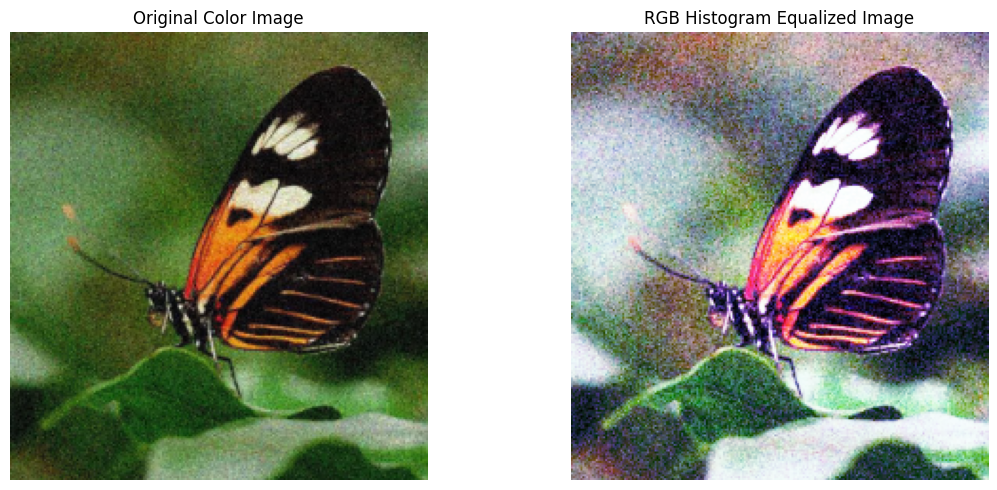

In [23]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(color_img_rgb)
plt.title("Original Color Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(color_eq)
plt.title("RGB Histogram Equalized Image")
plt.axis("off")

plt.tight_layout()
plt.show()

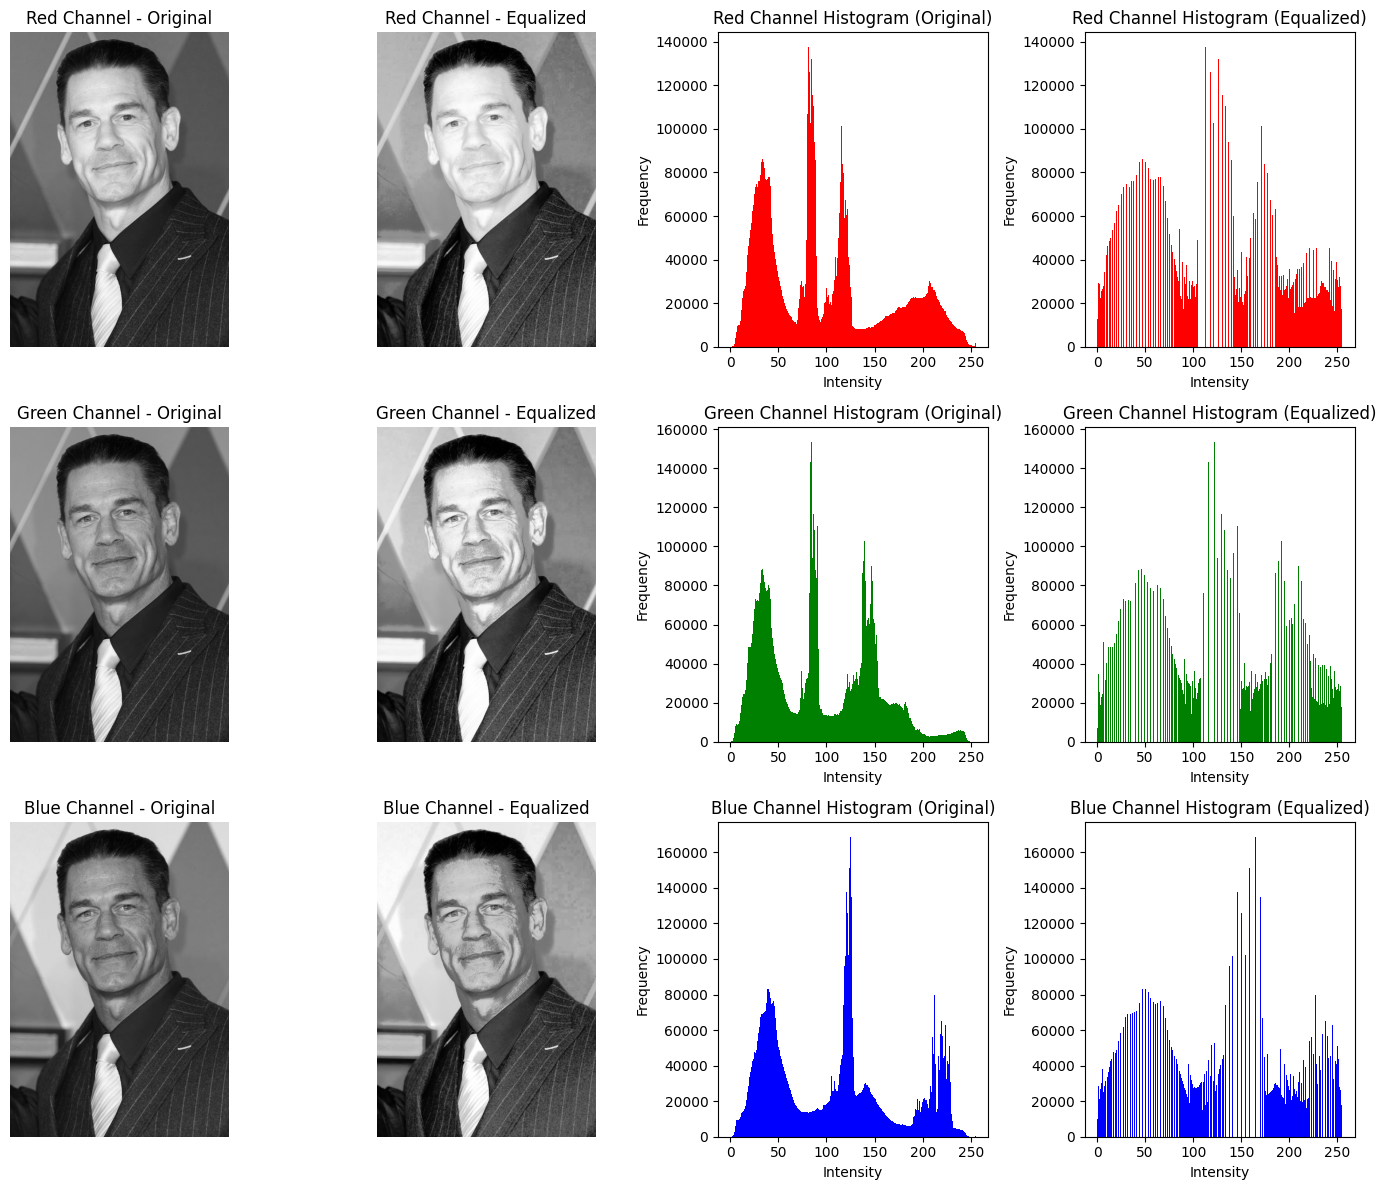

In [12]:
channels = [
    ('Red Channel', R, R_eq, 'red'),
    ('Green Channel', G, G_eq, 'green'),
    ('Blue Channel', B, B_eq, 'blue')
]

plt.figure(figsize=(14, 12))

plot_index = 1

for title, orig, eq, color in channels:

    # Original channel image
    plt.subplot(3, 4, plot_index)
    plt.imshow(orig, cmap='gray')
    plt.title(f'{title} - Original')
    plt.axis('off')
    plot_index += 1

    # Equalized channel image
    plt.subplot(3, 4, plot_index)
    plt.imshow(eq, cmap='gray')
    plt.title(f'{title} - Equalized')
    plt.axis('off')
    plot_index += 1

    # Original histogram
    plt.subplot(3, 4, plot_index)
    plt.hist(orig.ravel(), bins=256, color=color)
    plt.title(f'{title} Histogram (Original)')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plot_index += 1

    # Equalized histogram
    plt.subplot(3, 4, plot_index)
    plt.hist(eq.ravel(), bins=256, color=color)
    plt.title(f'{title} Histogram (Equalized)')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plot_index += 1

plt.tight_layout()
plt.show()


task 3

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Screenshot 2026-01-30 121357.png to Screenshot 2026-01-30 121357 (1).png


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get uploaded image name
image_name = list(uploaded.keys())[0]

# Read image
img = cv2.imread(image_name)

# Convert BGR to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [3]:
# ROI coordinates (y1:y2, x1:x2)
# Example: center region
h, w = gray.shape

x1 = w // 4
x2 = w // 2
y1 = h // 4
y2 = h // 2

roi = gray[y1:y2, x1:x2]


In [4]:
roi_eq = cv2.equalizeHist(roi)

# Replace ROI back
gray[y1:y2, x1:x2] = roi_eq


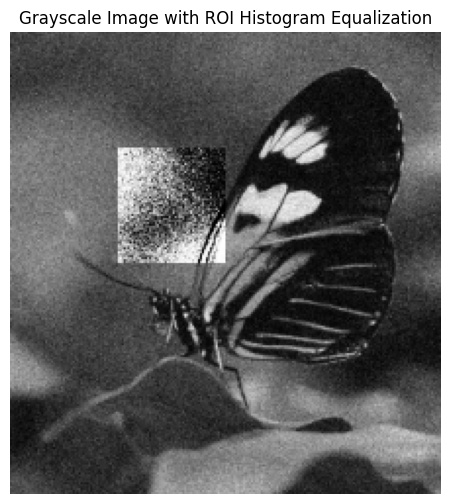

In [7]:
plt.figure(figsize=(6,6))
plt.title("Grayscale Image with ROI Histogram Equalization")
plt.imshow(gray, cmap='gray')
plt.axis("off")
plt.show()


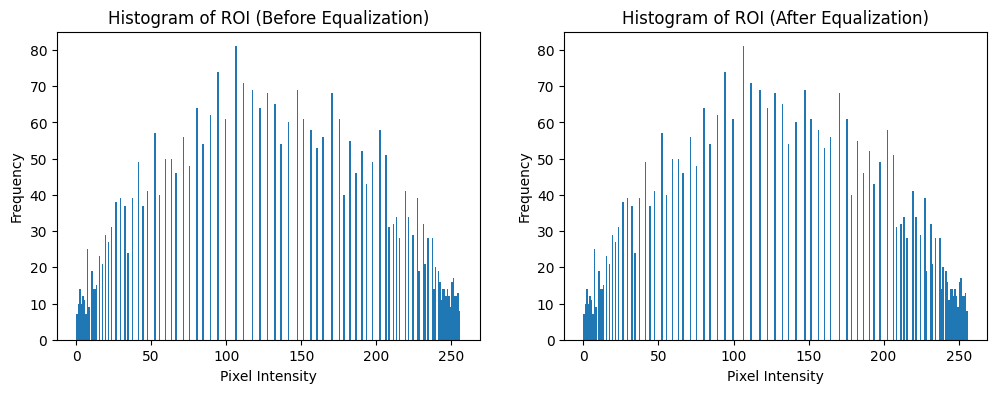

In [6]:
plt.figure(figsize=(12,4))

# Histogram BEFORE equalization
plt.subplot(1,2,1)
plt.hist(roi.flatten(), bins=256, range=(0,256))
plt.title("Histogram of ROI (Before Equalization)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Histogram AFTER equalization
plt.subplot(1,2,2)
plt.hist(roi_eq.flatten(), bins=256, range=(0,256))
plt.title("Histogram of ROI (After Equalization)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()
